# Linear Regression

## Prediction of House Price Using Linear Regression

In [137]:
import pandas as pd
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

%matplotlib inline

###  Explore Data

In [138]:
# Read CSV
path = "/Users/gracechongzuting/Downloads/Sacramento_transactions (1).csv"
house_csv = pd.read_csv(path)

In [139]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [140]:
house_csv.describe(include='all')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,985,985,985.000000,985,985.000000,985.000000,985.000000,985,985,985.000000,985.000000,985.000000
unique,981,39,NaN,1,NaN,NaN,NaN,4,5,NaN,NaN,NaN
top,8306 CURLEW CT,SACRAMENTO,NaN,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,NaN,NaN,NaN
freq,2,439,NaN,985,NaN,NaN,NaN,917,268,NaN,NaN,NaN
mean,NaN,NaN,95750.697462,NaN,2.911675,1.776650,1314.916751,NaN,NaN,234144.263959,38.607732,-121.355982
std,NaN,NaN,85.176072,NaN,1.307932,0.895371,853.048243,NaN,NaN,138365.839085,0.145433,0.138278
min,NaN,NaN,95603.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,1551.000000,38.241514,-121.551704
25%,NaN,NaN,95660.000000,NaN,2.000000,1.000000,952.000000,NaN,NaN,145000.000000,38.482717,-121.446127
50%,NaN,NaN,95762.000000,NaN,3.000000,2.000000,1304.000000,NaN,NaN,213750.000000,38.626582,-121.376220
75%,NaN,NaN,95828.000000,NaN,4.000000,2.000000,1718.000000,NaN,NaN,300000.000000,38.695589,-121.295778


###  Predict Price

We are going to predict `price` from available information.

 Target Variable? Why?

Target variable:dependent variable is assigned a role as the target variable = x

Dependent variable is price = Y

Independent/Predictor variable.

In [141]:
independent_cols = ['beds', 'baths','sq__ft']
independent_house_cols = house_csv[independent_cols]
independent_house_cols

,beds,baths,sq__ft
0,2,1,836
1,3,1,1167
2,2,1,796
3,2,1,852
4,2,1,797
...,...,...,...
980,4,3,2280
981,3,2,1477
982,3,2,1216
983,4,2,1685


In [142]:
independent_house_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   beds    985 non-null    int64
 1   baths   985 non-null    int64
 2   sq__ft  985 non-null    int64
dtypes: int64(3)
memory usage: 23.2 KB


#### Let's find a correlation between variables



Text(0.5, 1.0, 'number of beds VS price of house')

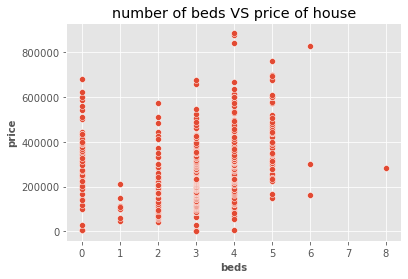

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

beds_distribution = sns.scatterplot(x = house_csv['beds'], y = 'price', data = house_csv, palette= 'rainbow')

plt.xlabel('beds', fontweight = 'heavy', fontsize = 10)
plt.ylabel('price',fontweight = 'heavy', fontsize =10)
plt.title('number of beds VS price of house')







from above scatter plot of beds verses price, we couldn't really obtain a true understanding about determining the interquartile distribution , we would need to plot a box diagram to clearly locate its mean price.

Text(0.5, 1.0, 'number of beds VS price of house')

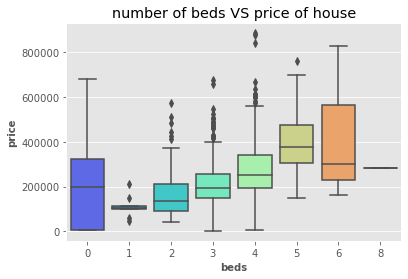

In [144]:
beds_distribution = sns.boxplot(x = house_csv['beds'], y = 'price', data = house_csv, palette= 'rainbow')

plt.xlabel('beds', fontweight = 'heavy', fontsize = 10)
plt.ylabel('price',fontweight = 'heavy', fontsize =10)
plt.title('number of beds VS price of house')

from above beds verses price of boxplot, we could tell from interquartile distribution that increasing number of beds , also promotes a positive correlation with price of house. this relationship seem to exhibits only when number of beds is not zero.

Let's take a look, to see correlation between number of baths and price.



Text(0.5, 1.0, 'number of baths VS price of house')

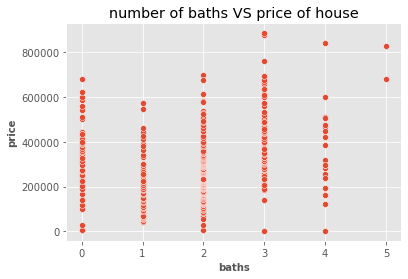

In [145]:
beds_distribution = sns.scatterplot(x = house_csv['baths'], y = 'price', data = house_csv, palette= 'rainbow')

plt.xlabel('baths', fontweight = 'heavy', fontsize = 10)
plt.ylabel('price',fontweight = 'heavy', fontsize =10)
plt.title('number of baths VS price of house')

similarly, a scatterplot does not show a interquartile price bulk distribution. Let's plot a boxplot in this case.

Text(0.5, 1.0, 'square feet of house VS price of house')

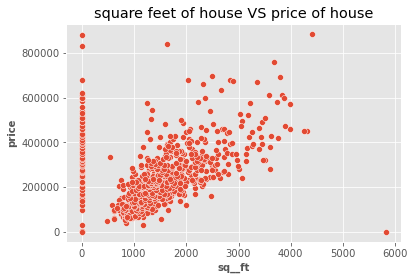

In [146]:
beds_distribution = sns.scatterplot(x = house_csv['sq__ft'], y = 'price', data = house_csv, palette= 'rainbow')

plt.xlabel('sq__ft', fontweight = 'heavy', fontsize = 10)
plt.ylabel('price',fontweight = 'heavy', fontsize =10)
plt.title('square feet of house VS price of house')



As you can see, there are strange prices when size of square feet of house is 0, which needs to be removed before building linear regression model

In [147]:
train_data_2d = house_csv[house_csv['sq__ft'] > 0]

Text(0.5, 1.0, 'square feet of house VS price of house')

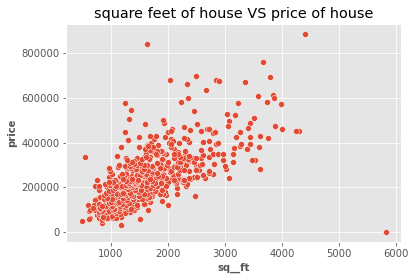

In [148]:
beds_distribution = sns.scatterplot(x = train_data_2d['sq__ft'], y = 'price', data = train_data_2d, palette= 'rainbow')

plt.xlabel('sq__ft', fontweight = 'heavy', fontsize = 10)
plt.ylabel('price',fontweight = 'heavy', fontsize =10)
plt.title('square feet of house VS price of house')

#### Now, we are ready to find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.



Explore following methods:

- fit
- predict
- score

In [149]:
from sklearn.linear_model import LinearRegression


##### Fit dependent variable and target variables using linear regression 

In [150]:
train_data = house_csv[house_csv['sq__ft'] > 0]

- y = Outcome Variable = Dependent = Vector equation (y = mx + c + episilon error) = Price
- X = Predicted Variable = Independent = Matrix (n =rows, p = features or column) - matrix because usually has >1 variable to compare. = sq__ft & beds

### Step 1: assemble XY variables

In [151]:


X = train_data[['sq__ft', 'beds']].values.reshape(-1,2)
y = train_data['price']

below to print number of rows and columns in ORIGINAL dataset.

In [152]:
print(X.shape)
print(y.shape)

(814, 2)
(814,)


In [153]:
X

array([[ 836,    2],
       [1167,    3],
       [ 796,    2],
       ...,
       [1216,    3],
       [1685,    4],
       [1362,    3]])

##### Find R Score

#### Step 2: Instantiate model

In [154]:

lr = LinearRegression()

#### Step 3: Fit the model

In [155]:

data_model = lr.fit(X,y)

#### Step 4: take a peek of model coefficient and intercept

In [156]:

print(data_model.intercept_)
print(data_model.coef_)

50402.29834449291
[   135.10514597 -11072.97886264]


Let's make some predicted price after determining Regression line of predicted actual data.(UNTRAINED)

In [157]:
data_model.predict([[1204, 3]])

array([179849.95750398])

In [158]:
Y= lr.score(X,y)
Y

0.4844302611189263

#### Step 5: Let's understand the correlation of actual predicted Regressioned data (without being trained) yet, between 2 independent variables and 1 dependent variable.

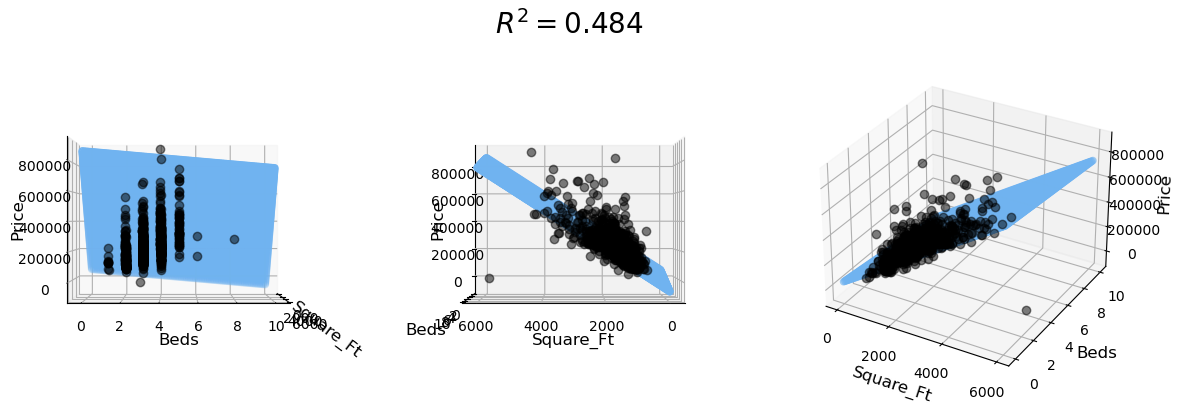

In [159]:
x1 = X[:, 0]
x2 = X[:, 1]
z = train_data['price']
x_tr = np.linspace(0, 6000, 100)   # range of sqft values, number of datapoints 
y_tr = np.linspace(0, 10, 100)  # range of beds values, number of datapoints
xx_tr, yy_tr = np.meshgrid(x_tr, y_tr)
model_viz = np.array([xx_tr.flatten(), yy_tr.flatten()]).T
y_pred = lr.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x1, x2, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_tr.flatten(), yy_tr.flatten(), y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Square_Ft', fontsize=12)
    ax.set_ylabel('Beds', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=0, azim=0)
ax2.view_init(elev=0, azim=90)

fig.suptitle('$R^2 = %.3f$' % Y, fontsize=20)

fig.tight_layout()

#### step 7:  interpret line regression model (using Rsquare coefficient formula)

In [160]:

Y= lr.score(X,y)
Y
#current actual data of Rsquare coefficient fitted 48.44%

0.4844302611189263

From above, we see current actual predicted Regressed data of Rsquare coefficient fitted 48.44%. 

### Now, let's split data for training and testing purposes.

In [161]:

from sklearn.model_selection import train_test_split,cross_val_score 

In [162]:




x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)


- we tooks 67% of data for Training. (TRAINED)
- 33% of data for Testing. (NOT TRAINED)


In [163]:

print(x_train.shape)
print(y_train.shape)


(545, 2)
(545,)


In [164]:
#33 percent data (untrained)
print(x_test.shape)
print(y_test.shape)


(269, 2)
(269,)


Time to test on Trained model.

In [165]:


trained_lr = LinearRegression()


In [166]:
model = trained_lr.fit(x_train,y_train)
model

LinearRegression()

In [167]:
Yhat = model.score(x_test,y_test)
Yhat

#Trained data of Rsquare coefficient fitted 45.52%

0.4551577139439138

- Now, we see Trained data of Rsquare coefficient fitted 45.5%.
- Originally, the predicted Regressed line from data of Rsquare coefficient fittet was 48.4%

Let's find its Residuals error.

In [168]:

error = Y - Yhat
error
# hence, there is a 2.90% error between trained and original data

0.029272547175012487

Now, we see the difference of residuals is a 2.90%.

In [169]:
print(model.intercept_)
print(model.coef_)

49047.53117986096
[  131.52630969 -8567.69815523]


Compute Mean Square Error (MSE), to determine effectiveness of trained regressed model.


In [170]:

mse= np.mean(error**2)

mse

0.0008568820181133315

almost close to zero MSE, meaning is close to data line.

Now, let's compare by making a Price prediction using same independent variable of 1204 sq__ft and 3 bedroom, after being TRAINED.

In [171]:

model.predict([[1204, 3]])

array([181702.11358603])

results of MSE are relatively good showing almost less than 1% of variability. Let's make a plot between actual data line AND Trained data line.

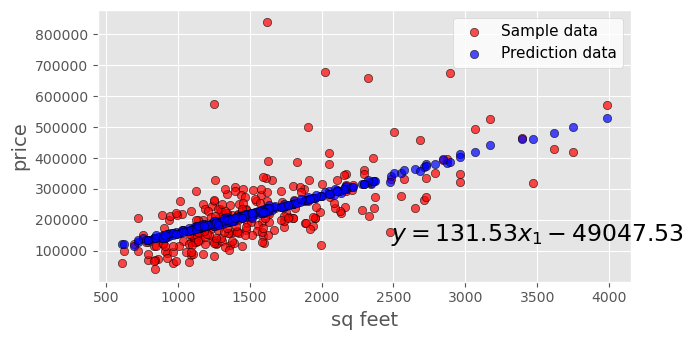

In [172]:

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

# ax.plot(x_pred, y_pred, color='k', label='Regression model')
# x_test = bed and sq_ft
# y_test = price
ax.scatter(x_test[:, 0], y_test, edgecolor='k', facecolor='red', alpha=0.7, label='Sample data') 
ax.scatter(x_test[:, 0], model.predict(x_test), edgecolor='k', facecolor='blue', alpha=0.7, label='Prediction data')
ax.set_ylabel('price', fontsize=14)
ax.set_xlabel('sq feet', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()


## Now, let's do a Scaling. As we know number of beds and square feet are two different units.
- to scale our data, we essentially will convert it into Z-score.

In [173]:

from sklearn.preprocessing import StandardScaler

In [174]:
house_ss = StandardScaler()

In [175]:
house_ss.fit(X)

StandardScaler()

In [176]:
X_scaled = house_ss.transform(X)

In [177]:
X_scaled

array([[-1.13823854, -1.46131019],
       [-0.63931931, -0.28706883],
       [-1.19853089, -1.46131019],
       ...,
       [-0.56546118, -0.28706883],
       [ 0.14146668,  0.88717253],
       [-0.34539408, -0.28706883]])

In [178]:
lr.fit(X_scaled,y)

LinearRegression()

In [179]:
lr.score(X_scaled,y)

0.4844302611189263

## As shown above, the score showed its result before being trained, essentially our hypothesis turns out to show the same Rsquare value as before being scaled !

In [181]:
cross_val_score(lr,X_scaled,y,cv=5).mean()

0.403100263890544

In [183]:
cross_val_score(lr,X,y,cv=5).mean()

0.403100263890544

In [182]:
cross_val_score(trained_lr,x_test,y_test,cv=5).mean()

0.435607785315317